In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 获取数据

# 用算法原理编写K-Means算法

In [96]:
import numpy as np
def distEclud(vecA,vecB):
    """
    计算两个向量的欧式距离
    """
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

def randCent(dataSet,k):
    """
    随机生成k个点作为质心，其中质心均在整个数据数据的边界之内
    """
    n=dataSet.shape[1] # 获取数据的维度
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = np.float(np.max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ+rangeJ*np.random.rand(k,1)
    return centroids

def kMeans(dataSet,k,distMeas=distEclud, createCent=randCent):
    """
    k-Means聚类算法,返回最终的k各质心和点的分配结果
    """
    m = dataSet.shape[0]  #获取样本数量
    # 构建一个簇分配结果矩阵，共两列，第一列为样本所属的簇类值，第二列为样本到簇质心的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    # 1. 初始化k个质心
    centroids = createCent(dataSet,k) 
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            # 2. 找出最近的质心
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 3. 更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:]=minIndex,minDist**2
        print(centroids) # 打印质心
        # 4. 更新质心
        for cent in range(k):
            ptsClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]] # 获取给定簇的所有点
            centroids[cent,:] = np.mean(ptsClust,axis=0) # 沿矩阵列的方向求均值
    return centroids,clusterAssment

# 二分K-Means算法

In [94]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    # 创建初始簇质心
    centroid0 = np.mean(dataSet,axis=0).tolist()[0]
    centList = [centroid0]
    # 计算每个点到质心的误差值
    for j in range(m):
        clusterAssment[j,1] = distMeas(np.mat(centroid0),dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            # 获取当前簇的所有数据
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A == i)[0],:]
            # 对该簇的数据进行K-Means聚类
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster,2,distMeas)
            sseSplit = sum(splitClustAss[:,1]) # 该簇聚类后的sse
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A != i)[0],1]) # 获取剩余收据集的sse
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        # 将簇编号0,1更新为划分簇和新加入簇的编号
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0]= len(centList)
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0]= bestCentToSplit

        print("the bestCentToSplit is: ",bestCentToSplit)
        print("the len of bestClustAss is: ",len(bestClustAss))
        # 增加质心
        centList[bestCentToSplit] = bestNewCents[0,:]
        centList.append(bestNewCents[1,:])

        # 更新簇的分配结果
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:] = bestClustAss
    return centList, clusterAssment
    

[[3.81078549 1.36601516]
 [5.18649374 1.87209445]]
[[2.57356322 0.67931034]
 [5.39365079 1.91746032]]
[[1.946875   0.4328125 ]
 [5.10581395 1.76976744]]
[[1.63090909 0.31636364]
 [4.98947368 1.71052632]]
[[1.56037736 0.29056604]
 [4.95876289 1.69587629]]
[[1.49215686 0.2627451 ]
 [4.92525253 1.68181818]]
the bestCentToSplit is:  0
the len of bestClustAss is:  150
[[2.17306668 0.97591881]
 [1.78890663 1.03796472]]
[[2.26666667 0.56666667]
 [1.44375    0.24375   ]]
[[2.45       0.75      ]
 [1.45306122 0.24285714]]
[[3.    1.1  ]
 [1.462 0.246]]
[[4.72921953 1.35093243]
 [3.69150688 1.23649466]]
[[5.20897436 1.81923077]
 [3.87142857 1.17142857]]
[[5.3796875  1.9125    ]
 [4.09428571 1.26      ]]
[[5.51481481 1.99444444]
 [4.21777778 1.30666667]]
[[5.53846154 2.01346154]
 [4.24680851 1.31489362]]
[[5.58367347 2.02653061]
 [4.28       1.344     ]]
[[5.59583333 2.0375    ]
 [4.29411765 1.34705882]]
the bestCentToSplit is:  1
the len of bestClustAss is:  99
用二分K-Means算法原理聚类耗时： 0.182510614395

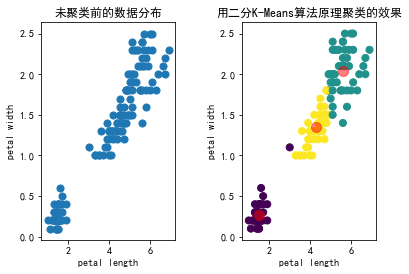

In [99]:
s=time.time()
myCentroids,clustAssing=biKmeans(X,3)  # myCentroids为簇质心
print("用二分K-Means算法原理聚类耗时：",time.time()-s)
centroids= np.array([i.A.tolist()[0] for i in myCentroids]) # 将matrix转换为ndarray类型
# 获取聚类后的样本所属的簇值，将matrix转换为ndarray
y_kmeans=clustAssing[:,0].A[:,0]
# 未聚类前的数据分布
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("未聚类前的数据分布")
plt.subplots_adjust(wspace=0.5)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# x0 = X[np.nonzero(clustAssing[:,0]==0)[0]]
# x1 = X[np.nonzero(clustAssing[:,0]==1)[0]]
# x2 = X[np.nonzero(clustAssing[:,0]==2)[0]]
# plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
# plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
# plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('petal length')
plt.ylabel('petal width')
# plt.legend(loc=2)
plt.title("用二分K-Means算法原理聚类的效果")
plt.show()  

In [51]:
import urllib
import json
import requests
def geoGrab(stAddress,city):
    apiStem = 'http://where.yahooapis.com/geocode?'
    params = {}  # 创建一个字典
    params['flags'] = 'J'
    params['appid'] = 'ppp68N8t'
    params['location'] = '%s %s' %(stAddress, city)
    # 将创建的字典转换为可以通过url进行传递的字符串格式
    url_params = urllib.parse.urlencode(params)  
    yahooApi = apiStem + url_params
    print(yahooApi)
    c = urllib.request.urlopen(yahooApi) # 打开url读取返回值，返回值是json格式
    return json.loads(c.read())  # 使用json将其解码为一个字典

from time import sleep
def massPlaceFind(fileName):
    fw = open('palces.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1],lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            fw.write('%s\t%f\t%f\n' %(line,lat,lng))
        else:
            print("error fetching")
        sleep(1)
    fw.close()
# geoGrab('1 VA Center','Augusta, ME')

ConnectionError: HTTPConnectionPool(host='where.yahooapis.com', port=80): Max retries exceeded with url: /geocode?flags=J&appid=ppp68N8t&location=1+VA+Center+Augusta%2C+ME (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x000002236AFDEF98>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

In [ ]:
import pi
# 球面距离计算及簇绘图函数
def distSLC(vecA,vecB):
    """
    球面距离计算，输入的单位是角度，sin()/cos()以弧度为输入，将角度*pi/180转换为弧度了
    """
    a = np.sin(vecA[0,1]*pi/180)*np.sin(vecB[0,1]*pi/180)
    b = np.cos(vecA[0,1]*pi/180)*np.cos(vecB[0,1]*pi/180)*np.cos((vecB[0,0]-vecA[0,0])*pi/180)
    return np.arccos(a+b)*6371.0
import matplotlib
import matplotlib.plot as plt
def clusterClubs(numClust = 5):
    datList = []
    for line in open('place.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]),float(lineArr[5])])  # 第4列和第5列分别对应的是纬度和经度，单位是角度
        datMat = np.mat(datList)
        myCentroids, clustAssing = biKmeans(datMat,numClust,distMeas=distSLC)
        fig = plt.figure()
        rect = [0.1,0.1,0.8,0.8]
        scatterMarkers = ['s','o','^','8','p','d','v','h','>','<']
        axprops = dict(xticks=[],yticks=[])
        ax0 = fig.add_axes(rect,label='ax0',**axprops)
        imgP = plt.imread('Portland.png')
        ax0 = imshow(imgP)
        ax1 = fig.add_axes(rect,label='ax1',frameon=False)
        for i in range(numClust):
            ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
            markerStyle = scatterMarkers[i % len(scatterMarkers)]
            ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0],ptsInCurrCluster[:,1].flatten().A[0],marker=markerStyle,s=90)
        
        ax1.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0],marker='+',s=300)
        plt.show()